In [1]:
import pandas as pd

iris_df = pd.read_csv("data/iris/iris.data", 
                      names=["sepal length", "sepal width", 
                             "petal length", "petal width", 
                             "class label"])
iris_df.head()

,sepal length,sepal width,petal length,petal width,class label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
import numpy as np

X = iris_df[["sepal length", "petal length"]].values
y = iris_df["class label"].values

print(f"X shape = {X.shape}\ny shape = {y.shape}")
print(np.unique(y))

X shape = (150, 2)
y shape = (150,)
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [3]:
from sklearn.preprocessing import LabelEncoder

print(f"在应用 LabelEncoder 之前：{np.unique(y)}")

le = LabelEncoder()
y = le.fit_transform(y)

print(f"在应用 LabelEncoder 之后：{np.unique(y)}")
print(f"使用 LabelEncoder 将数字转回文字：{np.unique(le.inverse_transform(y))}")

在应用 LabelEncoder 之前：['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
在应用 LabelEncoder 之后：[0 1 2]
使用 LabelEncoder 将数字转回文字：['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print(f"训练集中的样本数：{len(X_train)}")
print(f"测试集中的样本数：{len(X_test)}")
print(f"训练集中每个类别的样本数：{np.bincount(y_train)}")
print(f"测试集中每个类别的样本数：{np.bincount(y_test)}")

训练集中的样本数：105
测试集中的样本数：45
训练集中每个类别的样本数：[35 35 35]
测试集中每个类别的样本数：[15 15 15]


In [6]:
y_train

array([0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0,
       0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
       2, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0])

In [7]:
pd.DataFrame(X_train).describe()

,0,1
count,105.000000,105.000000
mean,5.857143,3.789524
std,0.834342,1.801598
min,4.300000,1.000000
25%,5.200000,1.600000
50%,5.800000,4.300000
75%,6.400000,5.100000
max,7.900000,6.900000


In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train) # 从训练集中获取每个特征取值的均值和标准差
X_train_std = sc.transform(X_train) # 缩放训练集特征
X_test_std = sc.transform(X_test) # 缩放测试集特征

pd.DataFrame(X_train_std).describe()

,0,1
count,1.050000e+02,1.050000e+02
mean,1.541624e-15,1.120797e-16
std,1.004796e+00,1.004796e+00
min,-1.875264e+00,-1.555787e+00
25%,-7.913958e-01,-1.221152e+00
50%,-6.881702e-02,2.847054e-01
75%,6.537617e-01,7.308854e-01
max,2.460209e+00,1.734790e+00


In [10]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# eta0 就是学习率，random_state 确保结果可复现
ppn = Perceptron(eta0=0.1, random_state=1) 
# 训练模型
ppn.fit(X_train_std, y_train)

# 在训练集和测试集上预测
y_train_pred = ppn.predict(X_train_std)
y_test_pred = ppn.predict(X_test_std)

print("在训练集上的准确率：{:.3f}%".format(accuracy_score(y_train, y_train_pred)))
print("在测试集上的准确率：{:.3f}%".format(accuracy_score(y_test, y_test_pred)))

在训练集上的准确率：0.876%
在测试集上的准确率：0.778%


In [11]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 绘制决策超平面
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # 绘制样本
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=colors[idx], marker=markers[idx], 
                    label=f'Class {cl}', edgecolor='black')
        
        # 高亮测试样本
        if test_idx:
            # plot all examples
            X_test, y_test = X[test_idx, :], y[test_idx]
            
            plt.scatter(X_test[:, 0], X_test[:, 1], c='none', 
                        edgecolor='black', alpha=1.0, linewidth=1, 
                        marker='o', s=100, label='Test set')

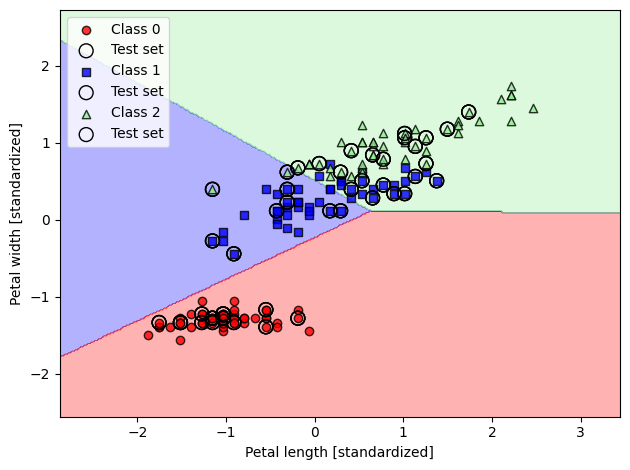

In [12]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, 
                      classifier=ppn, test_idx=range(105, 150))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()